<a href="https://colab.research.google.com/github/Rogerio-mack/Analise_de_Dados_2024S1/blob/main/Lab_A1_analise2024S1_B_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->



# Lab Avaliativo 1

Conceitos verificados neste Lab:

1. Construção em camadas do `Matplotlib` e seus elementos básicos
2. Como empregar os modos `script layer` e `artist layer`
3. Explorar gráficos de linha e distribuição  

**Ao final do Lab, faça um print do seu Colab em .pdf poste seu .pdf:**
```
Arquivo > Imprimir > Salvar como .pdf
```

# Basic imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Exercício 1

Empregando o Matplotlib, produza em um mesmo gráfico o gráfico de linha das funções:

1. $f(x) = tanh(x^2)$ (empregue `np.tanh()`), e

2. $g(x) = $ `np.random.sample(len(x)) - 0.5`

para $x \in [-10,10]$.

0. Para os valores de $x$ empregue a função `np.arange()`gerando valores com intervalos de $0.01$.
1. Inclua um título com a função
2. Empregue uma linha informando um código RGB para as cores de sua escolha com estilo pontilhado para função $f(x)$ e estilo sólido para função $g(x)$
3. Altere o tamanho da figura para 5x3
4. Inclua rótulos para os eixos do gráfico
5. Adicione os labels `f(x)` e `g(x)` para cada função

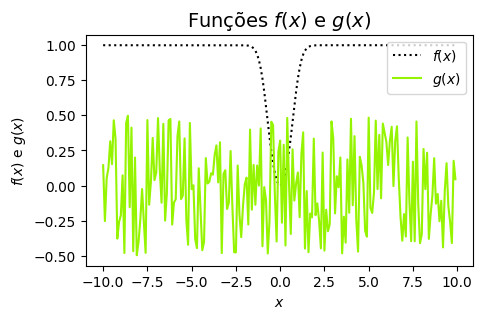

In [ ]:
# seu código
x = np.arange(-10.0,10.0,0.1)
y = np.random.sample(len(x)) - 0.5

plt.figure(figsize=(5,3))

plt.plot(x, np.tanh(x**2), color='#000000', linestyle=':', label='$f(x)$')
plt.plot(x, y, color='#95f400', linestyle='-', label='$g(x)$')

plt.title('Funções $f(x)$ e $g(x)$',fontsize=14)
plt.xlabel('$x$')
plt.ylabel('$f(x)$ e $g(x)$')
plt.legend(loc='upper right')
plt.show()

# Exercício 2  

Os dados abaixo representam os sinais neuronais médios de vários sujeitos em momentos de repouso (`cue`) e estímulo (`stim`) ao longo do tempo.



In [ ]:
#@markdown Execute para gerar os dados
df = sns.load_dataset('fmri')
df = df.sort_values('timepoint')
df = df[ (df.region == 'parietal') ].groupby(['timepoint','event'])[['signal']].mean().unstack().reset_index()
df.columns=['timepoint','signalcue','signalstim']
df[['signalcue','signalstim']] = ( df[['signalcue','signalstim']] - df[['signalcue','signalstim']].min() ) / df[['signalcue','signalstim']].max()
timepoint = df.timepoint.values
signalcue = df.signalcue.values
signalstim = df.signalstim.values

In [ ]:

df.head()

,timepoint,signalcue,signalstim
0,0,0.515189,0.279446
1,1,0.441182,0.224797
2,2,0.625985,0.296878
3,3,1.165660,0.584129
4,4,1.733394,0.993728


In [ ]:
timepoint, signalcue, signalstim

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 array([0.51518856, 0.44118189, 0.62598483, 1.16566016, 1.73339389,
        1.84928791, 1.41875184, 0.73240044, 0.20154002, 0.        ,
        0.05668747, 0.22809618, 0.4308568 , 0.60153069, 0.71624275,
        0.76981019, 0.73958396, 0.70246082, 0.67093576]),
 array([0.27944572, 0.22479661, 0.29687836, 0.58412937, 0.9937277 ,
        1.31209199, 1.36777453, 1.15023903, 0.78762217, 0.43513265,
        0.18003909, 0.03965136, 0.        , 0.01899543, 0.07219715,
        0.12678856, 0.16353611, 0.1776045 , 0.17504489]))

Produza 4 gráficos empregando **matplotlib** e o modo **artist layer** envolvendo as variáveis `df.timepoint`, `df.signalcue` e `df.signalstim` (ou se preferir `timepoint`, `signalcue` e `signalstim`) em uma mesma figura 8x6.

Os gráficos da figura serão os seguintes:

```
(1)   (2)

(3)   (4)
```

* (1) Gráfico dos sinais de repouso (`cue`) e estímulo (`stim`) no tempo. Inclua a legenda.
* (2) Gráfico de distribuição dos sinais de repouso (`cue`).
* (3) Gráfico do sinal de repouso (`cue`) no tempo.  
* (2) Gráfico de distribuição de densidade de probabilidade dos sinais estímulo (`stim`). Veja o parâmetro `density` da função do gráfico.

Não deixe de incluir título e rótulos para os eixos em cada gráfico. Ao final a figura produzida deverá ter o seguinte aspecto:




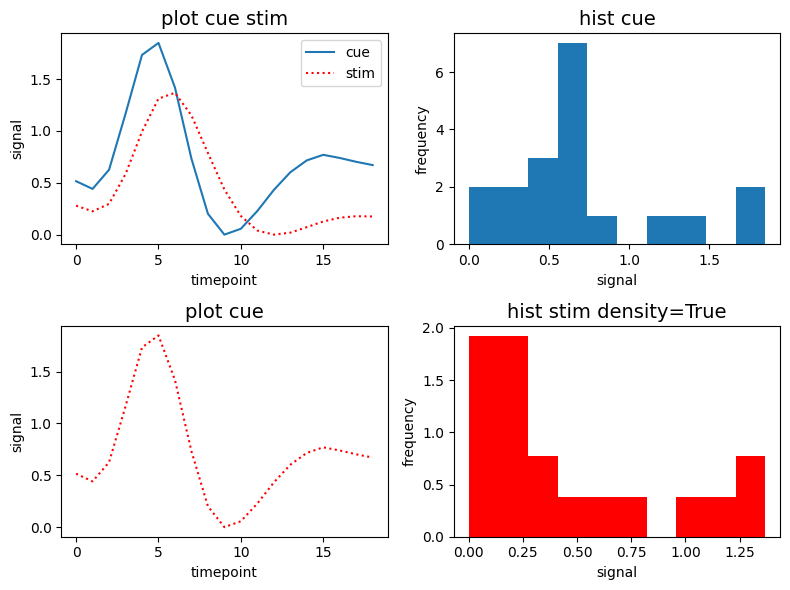

In [ ]:
# seu código
fig, ax = plt.subplots(2,2,figsize=(8,6))

ax[0,0].plot(df.timepoint, df.signalcue, label='cue')
ax[0,0].plot(df.timepoint, df.signalstim,'r:', label='stim')
ax[0,0].set_title('plot cue stim',fontsize=14)
ax[0,0].set_xlabel('timepoint')
ax[0,0].set_ylabel('signal')
ax[0,0].legend()

ax[0,1].hist(df.signalcue)
ax[0,1].set_title('hist cue',fontsize=14)
ax[0,1].set_xlabel('signal')
ax[0,1].set_ylabel('frequency')

ax[1,0].plot(df.timepoint, df.signalcue,'r:')
ax[1,0].set_title('plot cue',fontsize=14)
ax[1,0].set_xlabel('timepoint')
ax[1,0].set_ylabel('signal')

ax[1,1].hist(df.signalstim,density=True,color='r')
ax[1,1].set_title('hist stim density=True',fontsize=14)
ax[1,1].set_xlabel('signal')
ax[1,1].set_ylabel('frequency')

plt.tight_layout()
plt.show()

# Exercício 3  

Repita o exercício anterior com a forma **script layer**.   

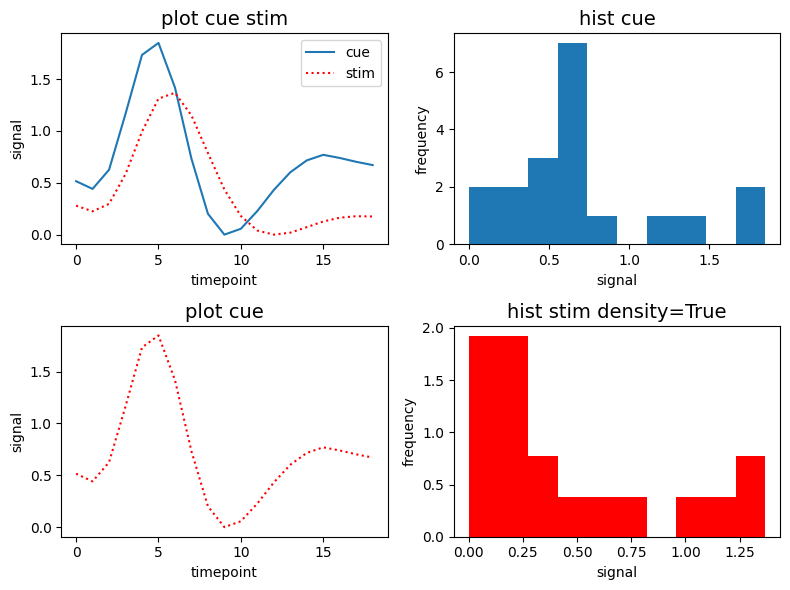

In [ ]:
# seu código
fig = plt.figure(figsize=(8,6))

plt.subplot(2,2,1)
plt.plot(timepoint, signalcue, label='cue')
plt.plot(timepoint, signalstim,'r:', label='stim')
plt.title('plot cue stim',fontsize=14)
plt.xlabel('timepoint')
plt.ylabel('signal')
plt.legend()

plt.subplot(2,2,2)
plt.hist(signalcue)
plt.title('hist cue',fontsize=14)
plt.xlabel('signal')
plt.ylabel('frequency')

plt.subplot(2,2,3)
plt.plot(timepoint,signalcue,'r:')
plt.title('plot cue',fontsize=14)
plt.xlabel('timepoint')
plt.ylabel('signal')

plt.subplot(2,2,4)
plt.hist(signalstim,density=True,color='r')
plt.title('hist stim density=True',fontsize=14)
plt.xlabel('signal')
plt.ylabel('frequency')

plt.tight_layout()
plt.show()